### This analysis is meant to find out factors that have significance in employees attrition, predict it and help      
###                                            proactively prevent this from happening

###### The Dataset used for this analysis is a fictional dataset provided by IBM data scientists
###### Below are the main steps we will execute  and predict whether or not an employee is about to leave the company



 1 - Exploratory Data Analysis

 2 - Label encoding and Features selection 

 3 - Implementation of ML Algoriths

In [148]:
try:
    sc.stop()
except:
    pass

In [149]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

sc = SparkContext()

spark = SparkSession(sparkContext= sc)

In [150]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### I - Exploratory Data Analysis

In [151]:
emp_df = spark.read.csv('file:///home/hadoop/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv', sep = ',', header=True, inferSchema='true')

In [252]:
emp_df.toPandas().head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,features,scaled_features
0,41,1,2,1102,0,1,2,4,2,0,...,3,1,0,8,0,1,6,0,"[41.0, 2.0, 1102.0, 0.0, 1.0, 2.0, 4.0, 2.0, 0...","[4.488048578282528, 2.5260813334497985, 2.7310..."
1,49,0,0,279,1,8,1,4,3,1,...,4,4,1,10,3,3,10,1,"[49.0, 0.0, 279.0, 1.0, 8.0, 1.0, 4.0, 3.0, 1....","[5.363765374044972, 0.0, 0.6914342205393799, 1..."
2,37,1,2,1373,1,2,2,0,4,1,...,3,2,0,7,3,3,0,0,"[37.0, 2.0, 1373.0, 1.0, 2.0, 2.0, 0.0, 4.0, 1...","[4.050190180401305, 2.5260813334497985, 3.4026..."
3,33,0,0,1392,1,3,4,4,4,0,...,3,3,0,8,3,3,8,3,"[33.0, 0.0, 1392.0, 1.0, 3.0, 4.0, 4.0, 4.0, 0...","[3.612331782520083, 0.0, 3.44973632613196, 1.8..."
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,"[27.0, 2.0, 591.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1....","[2.95554418569825, 2.5260813334497985, 1.46465..."


In [10]:
emp_df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [144]:
emp_df.groupby('Attrition').count().show()

+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+



In [145]:
emp_df.groupby('PerformanceRating','Attrition').count().show() 

+-----------------+---------+-----+
|PerformanceRating|Attrition|count|
+-----------------+---------+-----+
|                3|      Yes|  200|
|                3|       No| 1044|
|                4|       No|  189|
|                4|      Yes|   37|
+-----------------+---------+-----+



In [8]:
emp_df.toPandas().shape

(1470, 35)

In [9]:
emp_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Age,1470,36.923809523809524,9.135373489136729,18,60
Attrition,1470,None,None,No,Yes
BusinessTravel,1470,None,None,Non-Travel,Travel_Rarely
DailyRate,1470,802.4857142857143,403.50909994352804,102,1499
Department,1470,None,None,Human Resources,Sales
DistanceFromHome,1470,9.19251700680272,8.10686443566608,1,29
Education,1470,2.912925170068027,1.0241649445978718,1,5
EducationField,1470,None,None,Human Resources,Technical Degree
EmployeeCount,1470,1.0,0.0,1,1


 Check for missing values - 

In [11]:
from pyspark.sql.functions import *
emp_df.select([count(when(isnull(c), c)).alias(c) for c in emp_df.columns]).show()

+---+---------+--------------+---------+----------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+-------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPr

Count unique values 

In [13]:
emp_df.select('EducationField').distinct().count()

6

In [14]:
emp_df.groupby('EducationField').count().show()

+----------------+-----+
|  EducationField|count|
+----------------+-----+
|Technical Degree|  132|
|           Other|   82|
|       Marketing|  159|
|         Medical|  464|
|   Life Sciences|  606|
| Human Resources|   27|
+----------------+-----+



In [15]:
emp_df.select('Department').distinct().count()

3

In [17]:
emp_df.groupby('Department').count().show()

+--------------------+-----+
|          Department|count|
+--------------------+-----+
|               Sales|  446|
|Research & Develo...|  961|
|     Human Resources|   63|
+--------------------+-----+



In [21]:
emp_df.groupby('BusinessTravel').count().show()

+-----------------+-----+
|   BusinessTravel|count|
+-----------------+-----+
|Travel_Frequently|  277|
|       Non-Travel|  150|
|    Travel_Rarely| 1043|
+-----------------+-----+



In [21]:
emp_df.groupby('Gender').count().show()

+------+-----+
|Gender|count|
+------+-----+
|Female|  588|
|  Male|  882|
+------+-----+



In [28]:
emp_df.groupby('JobRole').count().toPandas()

,JobRole,count
0,Sales Executive,326
1,Manufacturing Director,145
2,Laboratory Technician,259
3,Sales Representative,83
4,Healthcare Representative,131
5,Research Scientist,292
6,Manager,102
7,Research Director,80
8,Human Resources,52


In [29]:
emp_df.groupby('MaritalStatus').count().toPandas()

,MaritalStatus,count
0,Married,673
1,Divorced,327
2,Single,470


In [26]:
emp_df.groupby('Over18').count().show()

+------+-----+
|Over18|count|
+------+-----+
|     Y| 1470|
+------+-----+



In [27]:
emp_df.groupby('Attrition').count().show()

+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+



In [30]:
emp_df.groupby('OverTime').count().show()

+--------+-----+
|OverTime|count|
+--------+-----+
|      No| 1054|
|     Yes|  416|
+--------+-----+



### Data Preprocessing

Label encoding

Attrition (0, 1)

In [153]:
emp_df = emp_df.withColumn("Attrition", when(emp_df.Attrition == 'Yes', 1).otherwise(0))

Department

In [154]:
emp_df = emp_df.withColumn("Department", when(emp_df.Department == 'Sales', 0). 
                                         when(emp_df.Department == 'Research & Development', 1).otherwise(2))

BusinessTravel

In [155]:
emp_df = emp_df.withColumn("BusinessTravel", when(emp_df.BusinessTravel == 'Travel_Frequently', 0). 
                                             when(emp_df.BusinessTravel == 'Non-Travel', 1).otherwise(2))

EducationField

In [156]:
emp_df = emp_df.withColumn("EducationField", when(emp_df.EducationField == 'Other', 0). 
                                             when(emp_df.EducationField == 'Technical Degree', 1).
                                             when(emp_df.EducationField == 'Marketing', 2).
                                             when(emp_df.EducationField == 'Medical', 3).
                                             when(emp_df.EducationField == 'Life Sciences', 4).otherwise(5))

Gender

In [157]:
emp_df = emp_df.withColumn("Gender", when(emp_df.Gender =='Female', 0).otherwise(1))

JobRole

In [158]:
emp_df = emp_df.withColumn("JobRole", when(emp_df.JobRole == 'Sales Executive', 0). 
                                             when(emp_df.JobRole == 'Manufacturing Director', 1).
                                             when(emp_df.JobRole == 'Laboratory Technician', 2).
                                             when(emp_df.JobRole == 'Sales Representative', 3).
                                             when(emp_df.JobRole == 'Healthcare Representative', 4).
                                             when(emp_df.JobRole == 'Research Scientist', 5).
                                             when(emp_df.JobRole == 'Manager', 6).
                                             when(emp_df.JobRole == 'Research Director', 7).otherwise(8))

MaritalStatus

In [159]:
emp_df = emp_df.withColumn("MaritalStatus", when(emp_df.MaritalStatus == 'Married', 0). 
                                            when(emp_df.MaritalStatus == 'Divorced', 1).otherwise(2))

OverTime

In [160]:
emp_df = emp_df.withColumn("OverTime", when(emp_df.OverTime == 'No', 0).otherwise(1))

Over18, EmployeeCount need to be dropped since they have single value for the whole dataset

In [233]:
emp_df = emp_df.drop('Over18')
emp_df = emp_df.drop('EmployeeCount')

Employee number not relevant for the Analysis

In [234]:
emp_df = emp_df.drop('EmployeeNumber')
emp_df = emp_df.drop('StandardHours')

In [235]:
emp_df.select('Attrition', 'Department', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime').show()

+---------+----------+--------------+--------------+------+-------+-------------+--------+
|Attrition|Department|BusinessTravel|EducationField|Gender|JobRole|MaritalStatus|OverTime|
+---------+----------+--------------+--------------+------+-------+-------------+--------+
|        1|         0|             2|             4|     0|      0|            2|       1|
|        0|         1|             0|             4|     1|      5|            0|       0|
|        1|         1|             2|             0|     1|      2|            2|       1|
|        0|         1|             0|             4|     0|      5|            0|       1|
|        0|         1|             2|             3|     1|      2|            0|       0|
|        0|         1|             0|             4|     1|      2|            2|       0|
|        0|         1|             2|             3|     0|      2|            0|       1|
|        0|         1|             2|             4|     1|      2|            1|       0|

In [163]:
emp_df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: integer (nullable = false)
 |-- BusinessTravel: integer (nullable = false)
 |-- DailyRate: integer (nullable = true)
 |-- Department: integer (nullable = false)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: integer (nullable = false)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: integer (nullable = false)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: integer (nullable = false)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: integer (nullable = false)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: integer (nullable = false)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- PerformanceRating: integer (nullable = tru

### Features Selection

Hypothesys testing

2 Sampled T-Test

H0:There is a significant relationship between Attrition and MaritalStatus
Ha: There is no significant relationship between the two attributes

Alpha = 0.05

In [243]:
from scipy import stats

In [236]:
df = emp_df.toPandas()

In [238]:
married_df = df[df['MaritalStatus']==0]
divorced_df = df[df['MaritalStatus']==1]
single_df = df[df['MaritalStatus']==2]

In [239]:
married_df.shape

(673, 29)

In [240]:
divorced_df.shape

(327, 29)

In [242]:
single_df.shape

(470, 29)

Make equal number of records 

In [245]:
married_df = married_df.sample(len(divorced_df))

Perform two Independent Sample T-Test

In [247]:
statistics , p_value = stats.ttest_ind(divorced_df['Attrition'], married_df['Attrition'])

In [249]:
p_value

0.4542809283221759

In [250]:
if p_value <= 0.05:
    print("We are rejecting Null Hypothesis")
else: 
    print("We fail to reject the Null Hypothesis")

We fail to reject the Null Hypothesis


Let's check for any eventual relationship between Attrition and JobSatifaction

H0:There is a significant relationship between Attrition and JobSatifaction
Ha: There is no significant relationship between the two attributes


In [254]:
not_satisfied = df[df['JobSatisfaction']==1]
very_satisfied = df[df['JobSatisfaction']==4]

In [255]:
not_satisfied.shape

(289, 29)

In [256]:
very_satisfied.shape

(459, 29)

Make equal number of records for both samples

In [258]:
very_satisfied = very_satisfied.sample(len(not_satisfied))

Perform the test

In [259]:
statistics , p_value = stats.ttest_ind(not_satisfied['Attrition'], very_satisfied['Attrition'])

In [260]:
p_value

0.0015836754803868302

In [261]:
if p_value <= 0.05:
    print("We are rejecting Null Hypothesis")
else: 
    print("We fail to reject the Null Hypothesis")

We are rejecting Null Hypothesis


#### Correlation

In [164]:
import pandas as pd
from pyspark.mllib.stat import Statistics

def compute_corr_matrix(df, method = 'pearson'):
    df_rdd = df.rdd.map( lambda r: r[0:] )
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat, columns=df.columns, index=df.columns)
    return(corr_mat_df)

In [165]:
compute_corr_matrix(emp_df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.028740,0.010661,0.031882,-0.001686,0.208034,0.034169,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.085306,-0.056652,-0.063991,0.077924,-0.031373,-0.042248,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.028740,-0.085306,1.000000,0.007010,0.005827,-0.014049,0.006464,-0.044398,0.011111,0.002456,...,-0.023271,-0.036246,0.004934,0.023408,0.001815,-0.012289,-0.015754,-0.006077,-0.030903,-0.018872
DailyRate,0.010661,-0.056652,0.007010,1.000000,-0.007109,-0.004985,-0.016806,-0.003777,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,0.005827,-0.007109,1.000000,-0.017225,-0.007996,0.184546,0.019395,0.041583,...,0.024604,0.022414,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,-0.014049,-0.004985,-0.017225,1.000000,0.021042,-0.009135,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.006464,-0.016806,-0.007996,0.021042,1.000000,-0.016406,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.034169,-0.042248,-0.044398,-0.003777,0.184546,-0.009135,-0.016406,1.000000,-0.061676,0.000460,...,0.009981,0.019520,0.027241,0.029329,-0.016105,-0.050426,0.017410,0.000477,0.013076,-0.006465
EnvironmentSatisfaction,0.010146,-0.103369,0.011111,0.018355,0.019395,-0.016075,-0.027128,-0.061676,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,0.002456,-0.011716,0.041583,-0.001851,-0.016547,0.000460,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


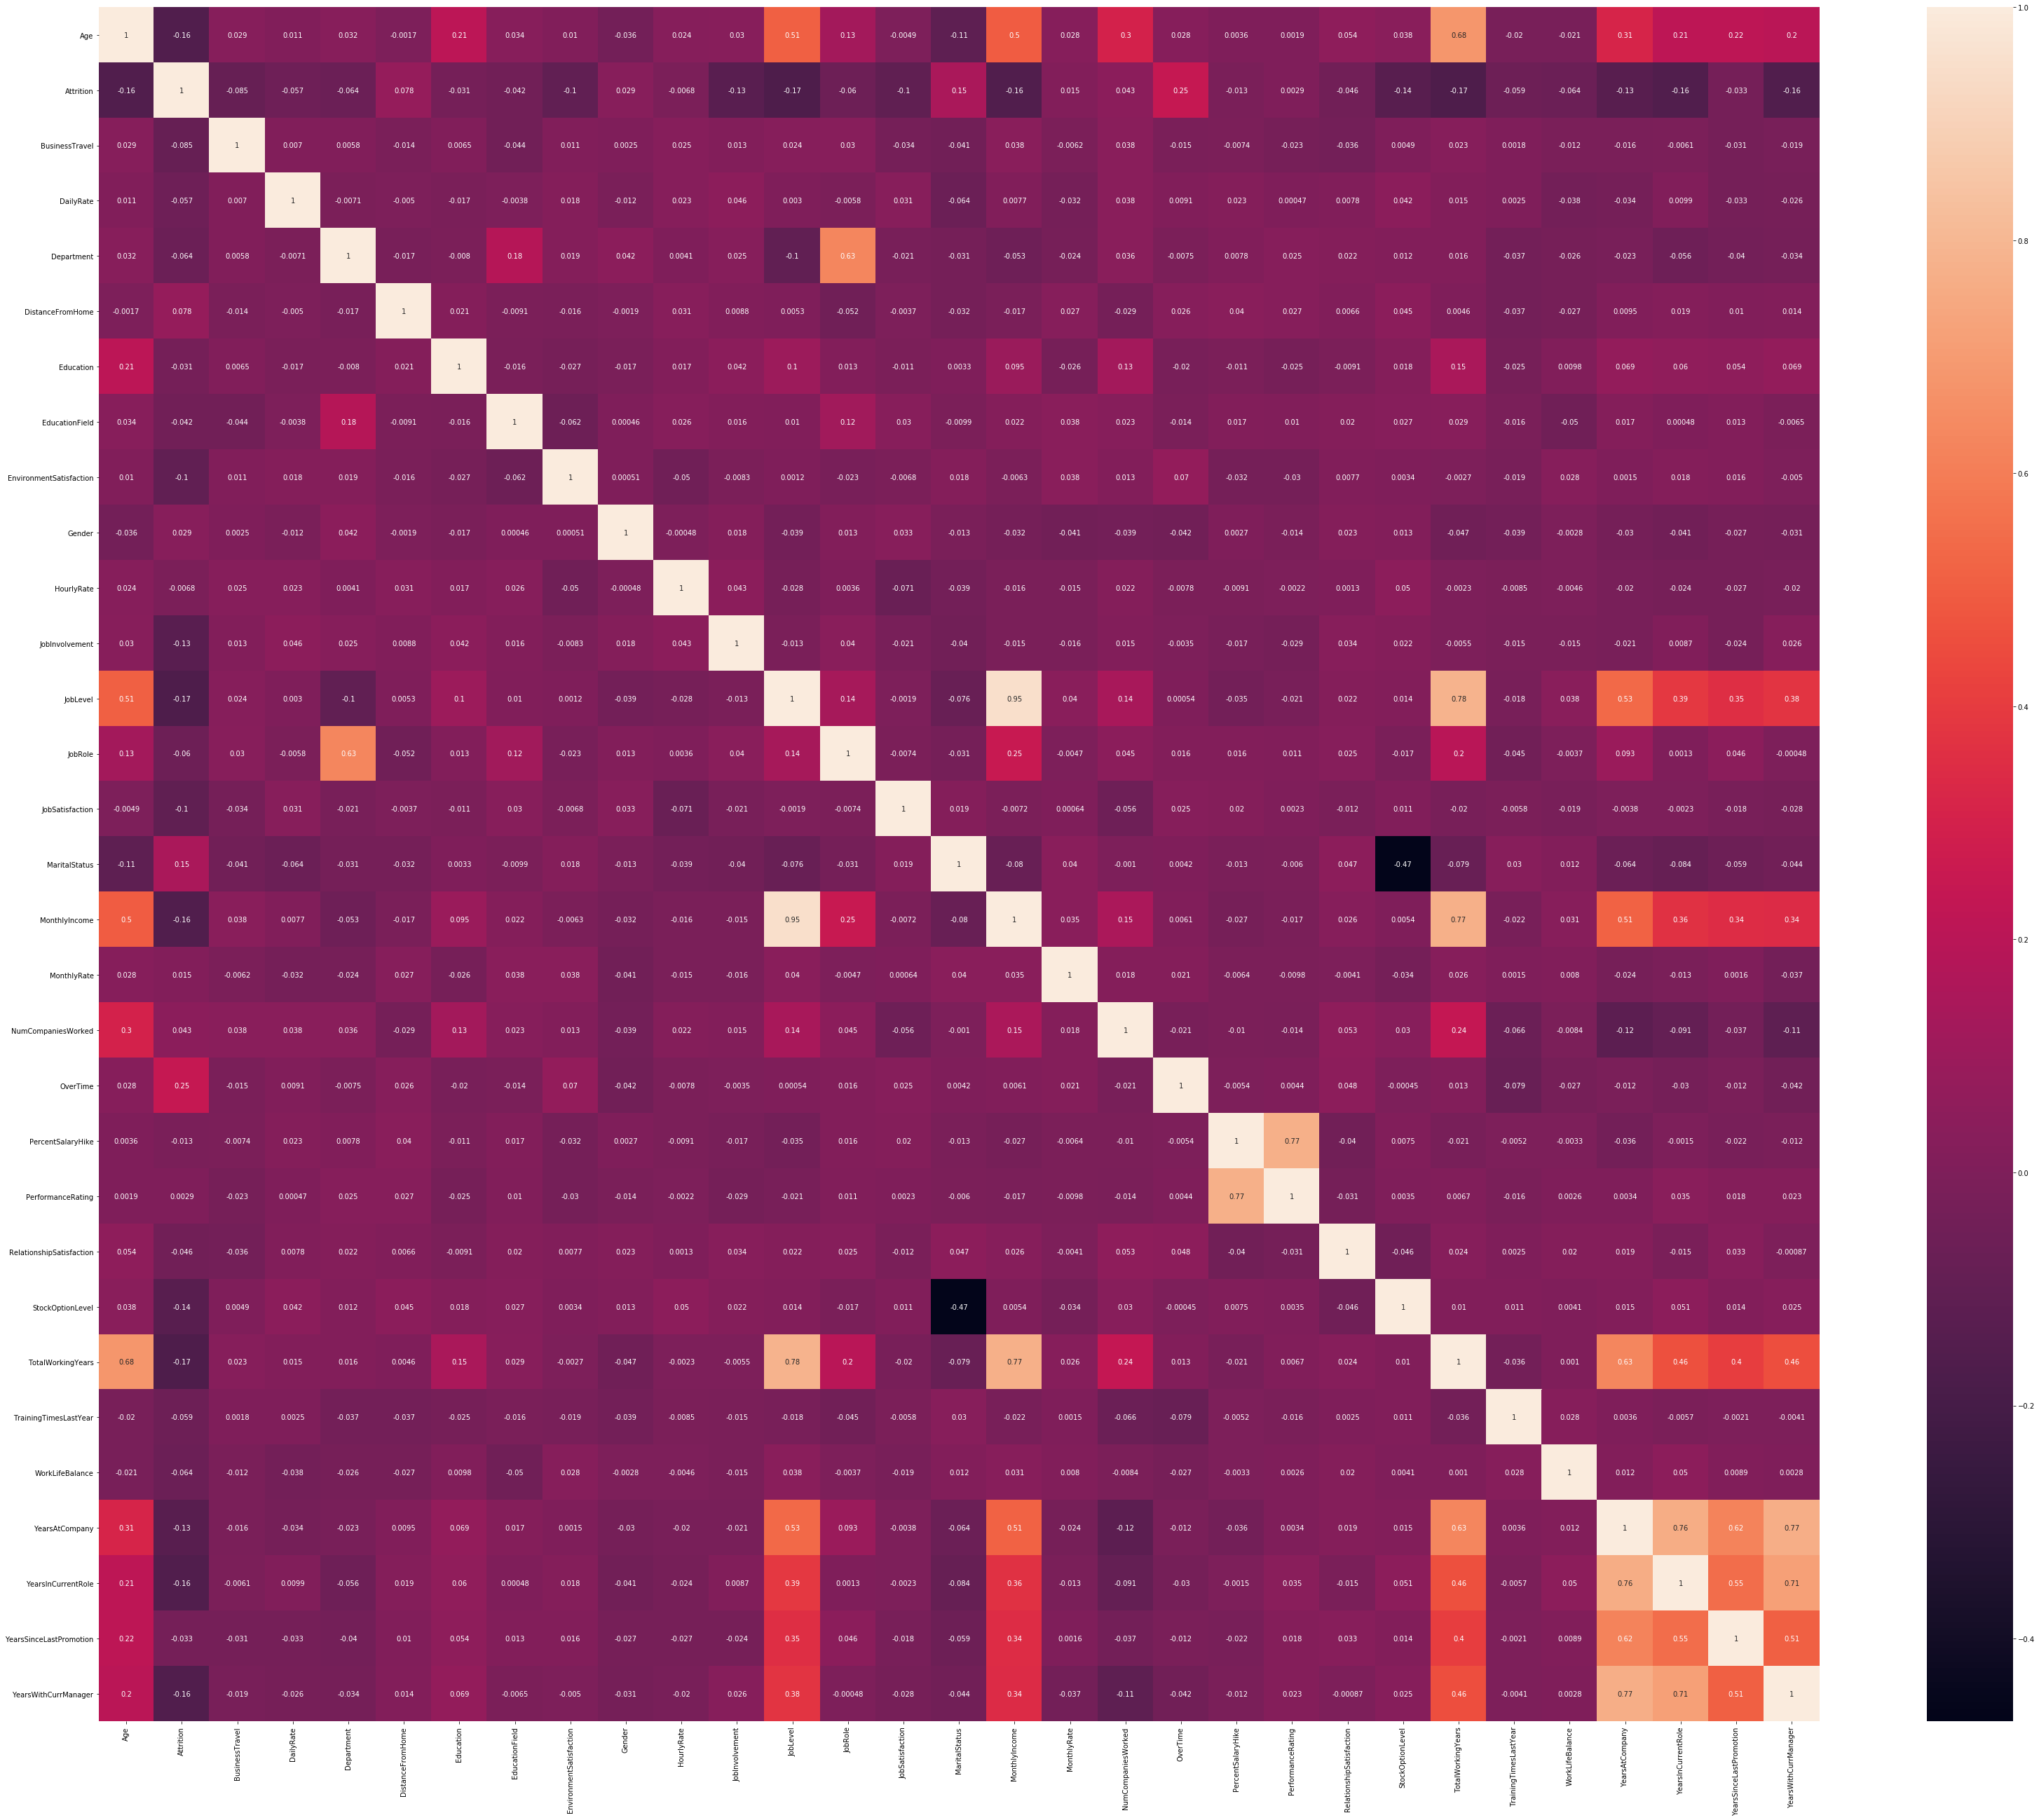

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(55, 45))
# plt.rc('xtick', labelsize=30) 
# plt.rc('ytick', labelsize=30)
# plt.rc('font', size=20)  
sns.heatmap(compute_corr_matrix(emp_df), annot=True)

Writing a function to identify the highly correlated features

In [166]:
def  correlation (dataset, threshold):
    col_corr = set()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if dataset.iloc[i, j] > threshold:
                colname = dataset.columns[i]
                col_corr.add(colname)
    return col_corr

In [167]:
corr = compute_corr_matrix(emp_df)

In [168]:
corr_features = correlation(corr, 0.75)

Highly correlated features

In [169]:
corr_features

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

Dropping highly correlated features to avoid overfitting

Dropping joblevel - Percentsalary - MonthlyIncome - YearsInCurrentRole - YearsWithCurrManager

In [171]:
emp_df = emp_df.drop('joblevel', 'Percentsalary', 'MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager')

Creating feature vectors

In [172]:
f_cols=emp_df.columns
f_cols.remove('Attrition')

In [173]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=f_cols, outputCol='features')

Conver input cols into features

In [174]:
emp_df = assembler.transform(emp_df)

In [175]:
emp_df.select('features').show(5, truncate=False)

+--------------------------------------------------------------------------------------------------------------------+
|features                                                                                                            |
+--------------------------------------------------------------------------------------------------------------------+
|[41.0,2.0,1102.0,0.0,1.0,2.0,4.0,2.0,0.0,94.0,3.0,0.0,4.0,2.0,19479.0,8.0,1.0,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,0.0] |
|[49.0,0.0,279.0,1.0,8.0,1.0,4.0,3.0,1.0,61.0,2.0,5.0,2.0,0.0,24907.0,1.0,0.0,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,1.0]|
|[37.0,2.0,1373.0,1.0,2.0,2.0,0.0,4.0,1.0,92.0,2.0,2.0,3.0,2.0,2396.0,6.0,1.0,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0]  |
|[33.0,0.0,1392.0,1.0,3.0,4.0,4.0,4.0,0.0,56.0,3.0,5.0,3.0,0.0,23159.0,1.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,3.0] |
|[27.0,2.0,591.0,1.0,2.0,1.0,3.0,1.0,1.0,40.0,3.0,2.0,2.0,0.0,16632.0,9.0,0.0,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0]  |
+-----------------------------------------------

Scaling


In [176]:
from pyspark.ml.feature import StandardScaler

standard_scaler = StandardScaler().setInputCol('features').setOutputCol('scaled_features')

emp_df = standard_scaler.fit(emp_df).transform(emp_df)

emp_df.select("features", "scaled_features")

DataFrame[features: vector, scaled_features: vector]

In [177]:
emp_df.select("features", "scaled_features").show(5)

+--------------------+--------------------+
|            features|     scaled_features|
+--------------------+--------------------+
|[41.0,2.0,1102.0,...|[4.48804857828252...|
|[49.0,0.0,279.0,1...|[5.36376537404497...|
|[37.0,2.0,1373.0,...|[4.05019018040130...|
|[33.0,0.0,1392.0,...|[3.61233178252008...|
|[27.0,2.0,591.0,1...|[2.95554418569825...|
+--------------------+--------------------+
only showing top 5 rows



 Train & test split

In [178]:
train, test = emp_df.randomSplit([.8,.2],  seed=111)

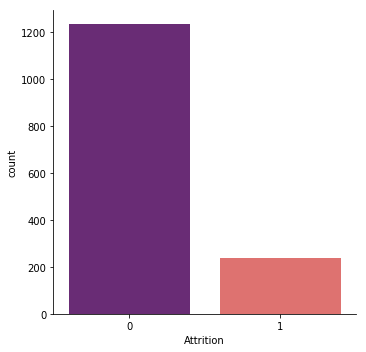

In [179]:
sns.catplot(x='Attrition', kind='count',
            data=emp_df.toPandas(), palette='magma')

Weighting for unequal sample size

In [180]:
dataset_size= float(train.select("Attrition").count())
num_positives= train.select("Attrition").where("Attrition == 1").count()
per_one = (float(num_positives)/dataset_size)

dataset_size, num_positives, per_one

print("The number of ones are %s" % num_positives)
print("Percentage of ones %s" % per_one)

The number of ones are 190
Percentage of ones 0.15966386554621848


In [181]:
num_negatives = dataset_size - num_positives
balance_ratio = num_negatives / dataset_size

print("balance_ratio = %s" % balance_ratio)

balance_ratio = 0.8403361344537815


In [182]:
train = train.withColumn("classWeights", when(train.Attrition == 1, balance_ratio).otherwise(1 - balance_ratio))
train.select("classWeights").show()

+-------------------+
|       classWeights|
+-------------------+
|0.15966386554621848|
|0.15966386554621848|
|0.15966386554621848|
|0.15966386554621848|
| 0.8403361344537815|
| 0.8403361344537815|
| 0.8403361344537815|
|0.15966386554621848|
|0.15966386554621848|
|0.15966386554621848|
| 0.8403361344537815|
| 0.8403361344537815|
| 0.8403361344537815|
|0.15966386554621848|
|0.15966386554621848|
|0.15966386554621848|
|0.15966386554621848|
|0.15966386554621848|
| 0.8403361344537815|
| 0.8403361344537815|
+-------------------+
only showing top 20 rows



### Logistic Regression

In [183]:
from pyspark.ml.classification import LogisticRegression

Weighted columns

In [184]:
logit_model = LogisticRegression(labelCol='Attrition', featuresCol='features', weightCol='classWeights', maxIter=20)

In [185]:
model = logit_model.fit(train)

In [186]:
predict_train = model.transform(train)
predict_test = model.transform(test)

In [189]:
predict_test.select("Attrition", "prediction").show()

+---------+----------+
|Attrition|prediction|
+---------+----------+
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        0|       1.0|
|        1|       1.0|
|        0|       0.0|
|        0|       0.0|
|        1|       1.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       1.0|
|        0|       0.0|
+---------+----------+
only showing top 20 rows



In [190]:
predict_test.where("Attrition == prediction").count(),\
predict_test.where("Attrition != prediction").count(),\
predict_test.where("Attrition == prediction").count()/predict_test.count(),

(214, 66, 0.7642857142857142)

In [191]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Attrition", predictionCol="prediction", 
                                             metricName="accuracy")

accuracy = evaluator.evaluate(predict_test)
print("Accuracy: ", (accuracy))

Accuracy:  0.7642857142857142


Confusion Matrix

In [192]:
from sklearn.metrics import confusion_matrix

In [193]:
y_true = predict_test.select('Attrition').toPandas()

y_pred = predict_test.select('prediction').toPandas()

confusion_mat = confusion_matrix(y_true, y_pred)

confusion_mat

array([[182,  51],
       [ 15,  32]])

Sensitivity /  Recall

In [195]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[0, 1])

0.7811158798283262

Specificity

In [196]:
confusion_mat[1, 1]/(confusion_mat[1, 1] + confusion_mat[1, 0])

0.6808510638297872

Precision

In [197]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[1, 0])

0.9238578680203046

### Decision Tree

In [198]:
from pyspark.ml.classification import DecisionTreeClassifier

In [199]:
dt = DecisionTreeClassifier(labelCol="Attrition", featuresCol="features")
dt_model = dt.fit(train)

In [200]:
dt_prediction = dt_model.transform(test)

In [201]:
dt_prediction.select("prediction", "Attrition", "features").show()

+----------+---------+--------------------+
|prediction|Attrition|            features|
+----------+---------+--------------------+
|       1.0|        1|[18.0,0.0,1306.0,...|
|       1.0|        1|[19.0,0.0,602.0,0...|
|       0.0|        1|[19.0,2.0,303.0,1...|
|       1.0|        1|[19.0,2.0,419.0,0...|
|       0.0|        1|[20.0,0.0,769.0,0...|
|       0.0|        1|[20.0,2.0,500.0,0...|
|       0.0|        0|[21.0,1.0,895.0,0...|
|       0.0|        1|[21.0,0.0,756.0,0...|
|       0.0|        0|[22.0,2.0,253.0,1...|
|       0.0|        0|[22.0,2.0,604.0,1...|
|       1.0|        1|[22.0,0.0,1256.0,...|
|       0.0|        1|[22.0,2.0,617.0,1...|
|       0.0|        0|[23.0,2.0,160.0,1...|
|       0.0|        0|[23.0,2.0,885.0,1...|
|       0.0|        0|[24.0,1.0,830.0,0...|
|       0.0|        0|[24.0,1.0,1092.0,...|
|       0.0|        0|[24.0,2.0,1353.0,...|
|       0.0|        1|[24.0,2.0,984.0,1...|
|       0.0|        0|[25.0,2.0,583.0,0...|
|       0.0|        0|[25.0,2.0,

Evaluation

In [207]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [208]:
evaluator = MulticlassClassificationEvaluator(labelCol="Attrition", predictionCol="prediction", 
                                             metricName="accuracy")

Evaluate on testing data

In [209]:
accuracy = evaluator.evaluate(dt_prediction)
print("Accuracy: ", (accuracy))

Accuracy:  0.8214285714285714


Confusion Matrix

In [211]:
y_true = dt_prediction.select('Attrition').toPandas()

y_pred = dt_prediction.select('prediction').toPandas()

confusion_mat = confusion_matrix(y_true, y_pred)

confusion_mat

array([[221,  12],
       [ 38,   9]])

Sensitivity /  Recall

In [212]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[0, 1])

0.9484978540772532

Specificity

In [213]:
confusion_mat[1, 1]/(confusion_mat[1, 1] + confusion_mat[1, 0])

0.19148936170212766

Precision

In [214]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[1, 0])

0.8532818532818532

### Random Forest

In [215]:
from pyspark.ml.classification import RandomForestClassifier as RF

We are using a Random Forest with numTrees = 72. And we train on training data and predict on test data

In [217]:
rf = RF(labelCol='Attrition', featuresCol='features', impurity = 'entropy', numTrees = 72, maxDepth = 12)
fit = rf.fit(train)
predict_test = fit.transform(test)

In [218]:
predict_test.select("Attrition", "prediction").show()

+---------+----------+
|Attrition|prediction|
+---------+----------+
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       0.0|
|        0|       0.0|
|        1|       1.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 20 rows



In [219]:
predict_test.where("Attrition == prediction").count(),\
predict_test.where("Attrition != prediction").count(),\
predict_test.where("Attrition == prediction").count()/predict_test.count(),

(245, 35, 0.875)

In [220]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Attrition", predictionCol="prediction", 
                                             metricName="accuracy")

accuracy = evaluator.evaluate(predict_test)
print("Accuracy: ", (accuracy))

Accuracy:  0.875



Confusion Matrix


In [221]:
y_true = predict_test.select('Attrition').toPandas()

y_pred = predict_test.select('prediction').toPandas()

confusion_mat = confusion_matrix(y_true, y_pred)

confusion_mat

array([[233,   0],
       [ 35,  12]])

Sensitivity /  Recall

In [222]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[0, 1])

1.0

Specificity

In [224]:
confusion_mat[1, 1]/(confusion_mat[1, 1] + confusion_mat[1, 0])

0.2553191489361702


Precision


In [225]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[1, 0])

0.8694029850746269

### Naive Bayes

In [102]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Multilabel or Multi Class Classification

In [226]:
NB = NaiveBayes(modelType= "multinomial", labelCol="Attrition", featuresCol ="features" )
nbModel = NB.fit(train)

nb_predictions = nbModel.transform(test)

In [227]:
nb_predictions.select('prediction', 'Attrition', 'features').show(5)

+----------+---------+--------------------+
|prediction|Attrition|            features|
+----------+---------+--------------------+
|       0.0|        1|[18.0,0.0,1306.0,...|
|       1.0|        1|[19.0,0.0,602.0,0...|
|       1.0|        1|[19.0,2.0,303.0,1...|
|       1.0|        1|[19.0,2.0,419.0,0...|
|       1.0|        1|[20.0,0.0,769.0,0...|
+----------+---------+--------------------+
only showing top 5 rows



In [228]:
evaluator = MulticlassClassificationEvaluator(labelCol= "Attrition", predictionCol = "prediction", 
                                              metricName="accuracy")

In [108]:
nb_accuracy = evaluator.evaluate(nb_predictions)

In [109]:
print("Accuracy : ", nb_accuracy)

Accuracy :  0.5857142857142857


Confusion Matrix

In [229]:
y_true = nb_predictions.select('Attrition').toPandas()

y_pred = nb_predictions.select('prediction').toPandas()

confusion_mat = confusion_matrix(y_true, y_pred)

confusion_mat

array([[139,  94],
       [ 22,  25]])

Sensitivity /  Recall

In [230]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[0, 1])

0.5965665236051502

Specificity

In [231]:
confusion_mat[1, 1]/(confusion_mat[1, 1] + confusion_mat[1, 0])

0.5319148936170213

In [232]:
confusion_mat[0, 0]/(confusion_mat[0, 0] + confusion_mat[1, 0])

0.8633540372670807